In [2]:

import numpy as np
import math, datascience
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.figure import Figure
#from matplotlib.backends.backend_tkagg import (FigureCanvasTkAGG, NavigationToolbar2Tk)
import pandas as pd
from tkinter import *

In [3]:
plt.style.use('fivethirtyeight')
batters = datascience.Table.read_table('stats.csv')
print(batters)

last_name   |  first_name | player_id | year | player_age | b_ab | b_total_pa | b_total_hits | b_single | b_double | b_triple | b_home_run | b_strikeout | b_walk | b_k_percent | b_bb_percent | batting_avg | slg_percent | on_base_percent | on_base_plus_slg | xba   | xslg  | woba  | xwoba | xobp  | xiso  | exit_velocity_avg | launch_angle_avg | sweet_spot_percent | barrel | barrel_batted_rate | hard_hit_percent | iz_contact_percent | whiff_percent | pull_percent | f_strike_percent | groundballs_percent | flyballs_percent | linedrives_percent | Unnamed: 39
Beltran     |  Carlos     | 136860    | 2017 | 40         | 467  | 509        | 108          | 65       | 29       | 0        | 14         | 102         | 33     | 20          | 6.5          | 0.231       | 0.383       | 0.283           | 0.666            | 0.229 | 0.369 | 0.283 | 0.284 | 0.284 | 0.139 | 87.3              | 13.4             | 29.4               | 17     | 4.6                | 31               | 89.1               | 19.8

In [4]:
last_seas = batters.where('year',2022).select('last_name','b_home_run', 'exit_velocity_avg', 'launch_angle_avg').sort('exit_velocity_avg', descending = True)
print(last_seas)



last_name    | b_home_run | exit_velocity_avg | launch_angle_avg
Judge        | 62         | 95.9              | 15
Alvarez      | 37         | 95.2              | 12.3
Schwarber    | 46         | 93.3              | 19.2
Devers       | 27         | 93.1              | 11.3
Olson        | 34         | 92.9              | 16.1
Ohtani       | 34         | 92.9              | 12.1
Guerrero Jr. | 32         | 92.8              | 4.3
Hernandez    | 25         | 92.6              | 11.6
Riley        | 38         | 92.5              | 12.9
Pham         | 17         | 92.2              | 7.7
... (120 rows omitted)


In [11]:
last_seas = last_seas.relabeled('exit_velocity_avg','ev_avg').relabeled('b_home_run', 'hr').relabeled('launch_angle_avg', 'la_avg')
last_seas.show(10)

last_name,hr,ev_avg,la_avg
Judge,62,95.9,15
Alvarez,37,95.2,12.3
Schwarber,46,93.3,19.2
Devers,27,93.1,11.3
Olson,34,92.9,16.1
Ohtani,34,92.9,12.1
Guerrero Jr.,32,92.8,4.3
Hernandez,25,92.6,11.6
Riley,38,92.5,12.9
Pham,17,92.2,7.7


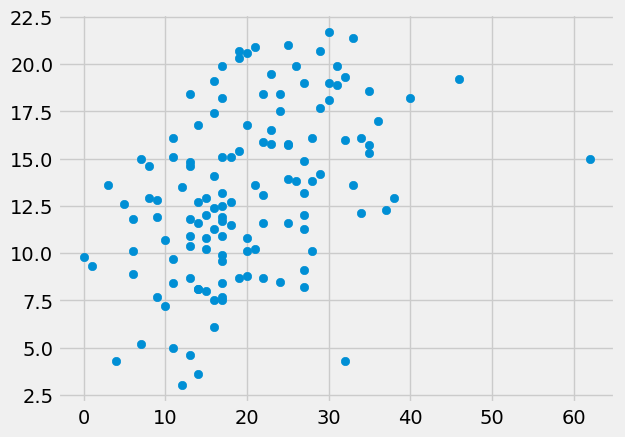

In [12]:
ev_2022 = last_seas.column('ev_avg')
hr_2022 = last_seas.column('hr')
la_2022 = last_seas.column('la_avg')
ev_vs_la = plt.scatter(hr_2022,la_2022)

In [13]:
la_hr_ev_2022 = last_seas.drop('last_name')

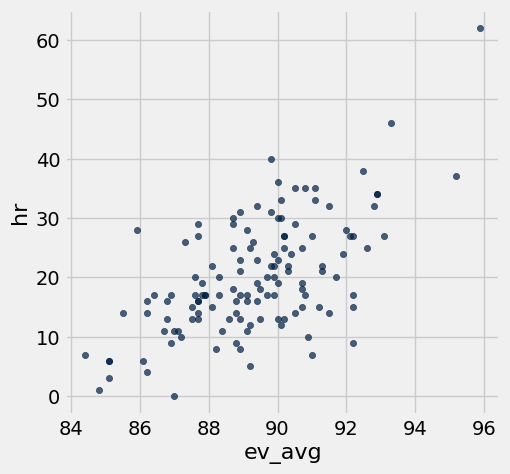

In [23]:
la_hr_ev_2022.scatter('ev_avg','hr')

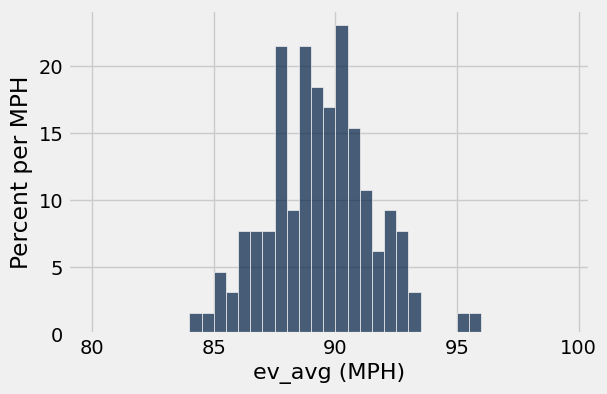

In [ ]:
ev_hist_2022 = last_seas.hist('ev_avg',bins=np.arange(80,100,0.5), unit='MPH')
#ev_hist_2022.label('Average Exit Velocity, 2022')

In [9]:
plt.scatter(ev_2022,hr_2022)
plt.xlabel('Average Exit Velocity')
plt.ylabel('# of Homeruns (2022)')
plt.title('Average EV vs # of Homeruns in 2022')
plt.show()


NameError: name 'ev_2022' is not defined

In [24]:
def year_getter(n:int):
    '''
    
    '''
    year = batters.where('year', n)
    return year    

In [53]:
def data_getter():
    '''

    '''
    n = int(input('What year do you want to look at?'))
    x_pt = str(input('x-axis:' ))
    y_pt = str(input('y-axis:'))
    year = year_getter(n)
    x = year.column(x_pt)
    y = year.column(y_pt)
    sctatter = plt.scatter(x,y)
    plt.xlabel(str(x_pt))
    plt.ylabel(str(y_pt))
    plt.title(f'{x_pt} vs {y_pt} in {n}')
    return sctatter


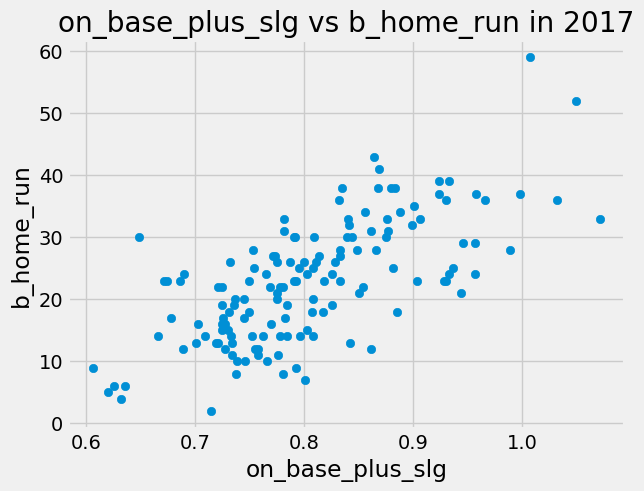

In [55]:
data_getter()